In [1]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, MaxPooling1D, Dropout, GlobalAveragePooling1D, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.regularizers import l2


import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
file_path = 'B-Ser.csv'

df = pd.read_csv(file_path)

df

,0,1,2,3,4,5,6,7,8,9,...,154,155,156,157,158,159,160,161,162,Emotion_Label
0,0.181929,0.597162,0.584452,0.663637,0.738467,0.684251,0.592274,0.605217,0.611734,0.713361,...,0.001424,0.000824,2.245705e-03,4.730351e-03,7.843456e-03,6.678044e-03,2.589605e-03,1.258858e-03,3.716425e-05,4
1,0.373793,0.752836,0.767736,0.811567,0.837361,0.801382,0.736421,0.722412,0.721140,0.749309,...,0.002378,0.001764,3.191589e-03,5.683203e-03,8.739583e-03,7.548534e-03,3.495810e-03,2.288241e-03,1.007357e-03,4
2,0.179078,0.581407,0.576625,0.674005,0.743081,0.647708,0.559811,0.605573,0.612860,0.715582,...,0.000581,0.000415,8.819485e-04,1.978945e-03,3.881180e-03,3.024464e-03,9.673847e-04,6.371708e-04,1.669109e-05,4
3,0.181940,0.609392,0.576482,0.649354,0.732143,0.703664,0.598831,0.607627,0.609744,0.704340,...,0.001424,0.000824,2.245646e-03,4.730394e-03,7.843437e-03,6.678062e-03,2.589596e-03,1.258859e-03,3.716428e-05,4
4,0.430646,0.690136,0.681142,0.712062,0.746599,0.718833,0.536348,0.523392,0.554430,0.522560,...,0.006053,0.014728,2.603143e-02,2.871043e-02,8.294137e-03,7.164728e-03,2.395335e-03,6.251118e-04,1.206434e-05,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5863,0.050528,0.671133,0.653239,0.666003,0.645347,0.701951,0.763060,0.787043,0.806889,0.784755,...,0.000024,0.000003,7.980836e-07,9.887120e-07,8.714226e-07,7.584952e-07,8.125273e-07,4.392478e-07,3.485117e-08,7
5864,0.152854,0.693109,0.692830,0.696784,0.694129,0.656598,0.631821,0.698296,0.724781,0.722576,...,0.000081,0.000035,4.049098e-05,8.601131e-06,3.937939e-06,2.715689e-06,3.084966e-06,2.419554e-06,3.091766e-08,7
5865,0.344638,0.736154,0.749546,0.767200,0.778888,0.770688,0.709407,0.764440,0.763983,0.760305,...,0.000425,0.000380,4.006812e-04,3.504132e-04,3.588180e-04,3.639401e-04,3.567266e-04,3.588423e-04,3.368800e-04,7
5866,0.156242,0.676020,0.659184,0.661553,0.672642,0.637998,0.627909,0.673449,0.698129,0.690269,...,0.000034,0.000014,1.760217e-05,4.374423e-06,1.535481e-06,1.221578e-06,1.183883e-06,1.036524e-06,1.610952e-08,7


In [3]:
X = df.iloc[: ,:-1].values
Y = df['Emotion_Label'].values

In [4]:
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [5]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, train_size=0.80, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((4694, 163), (4694, 5), (1174, 163), (1174, 5))

In [6]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((4694, 163), (4694, 5), (1174, 163), (1174, 5))

In [7]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((4694, 163, 1), (4694, 5), (1174, 163, 1), (1174, 5))

In [8]:
input_shape = (x_train.shape[1], 1)

model = Sequential([
    # First Conv1D Layer
    Conv1D(256, kernel_size=9, strides=1, padding='same', activation='relu', kernel_regularizer=l2(0.0001), input_shape=input_shape),
    BatchNormalization(),
    MaxPooling1D(pool_size=3, strides=2, padding='same'),
    Dropout(0.2),

    # Second Conv1D Layer
    Conv1D(512, kernel_size=7, strides=1, padding='same', activation='relu', kernel_regularizer=l2(0.0001)),
    BatchNormalization(),
    MaxPooling1D(pool_size=3, strides=2, padding='same'),
    Dropout(0.25),

    # Third Conv1D Layer
    Conv1D(1024, kernel_size=5, strides=1, padding='same', activation='relu', kernel_regularizer=l2(0.0001)),
    BatchNormalization(),
    MaxPooling1D(pool_size=3, strides=2, padding='same'),
    Dropout(0.3),

    # Fourth Conv1D Layer
    Conv1D(2048, kernel_size=3, strides=1, padding='same', activation='relu', kernel_regularizer=l2(0.0001)),
    BatchNormalization(),
    MaxPooling1D(pool_size=3, strides=2, padding='same'),
    Dropout(0.35),

    # Global Average Pooling
    GlobalAveragePooling1D(),

    # Fully connected layers
    Dense(2048, activation='relu', kernel_regularizer=l2(0.0001)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(1024, activation='relu', kernel_regularizer=l2(0.0001)),
    BatchNormalization(),
    Dropout(0.4),

    # Output layer
    Dense(5, activation='softmax')
])

# Compile the model
model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', verbose=1, save_best_only=True)
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.5, verbose=1, patience=5, min_lr=1e-7)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 163, 256)          2560      
                                                                 
 batch_normalization (BatchN  (None, 163, 256)         1024      
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 82, 256)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 82, 256)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 82, 512)           918016    
                                                                 
 batch_normalization_1 (Batc  (None, 82, 512)          2

In [9]:
# Train the model
history=model.fit(x_train, y_train, batch_size=64, epochs=400, validation_data=(x_test, y_test), callbacks=[rlrp, checkpointer])

Epoch 1/400
74/74 [==============================] - ETA: 0s - loss: 2.5214 - accuracy: 0.3862
Epoch 1: val_loss improved from inf to 5.93433, saving model to saved_models\audio_classification.hdf5
74/74 [==============================] - 11s 54ms/step - loss: 2.5214 - accuracy: 0.3862 - val_loss: 5.9343 - val_accuracy: 0.1627 - lr: 0.0010
Epoch 2/400
73/74 [============================>.] - ETA: 0s - loss: 1.9688 - accuracy: 0.4803
Epoch 2: val_loss did not improve from 5.93433
74/74 [==============================] - 3s 42ms/step - loss: 1.9682 - accuracy: 0.4806 - val_loss: 6.3280 - val_accuracy: 0.1917 - lr: 0.0010
Epoch 3/400
73/74 [============================>.] - ETA: 0s - loss: 1.7418 - accuracy: 0.5557
Epoch 3: val_loss did not improve from 5.93433
74/74 [==============================] - 3s 41ms/step - loss: 1.7393 - accuracy: 0.5569 - val_loss: 10.0936 - val_accuracy: 0.1976 - lr: 0.0010
Epoch 4/400
73/74 [============================>.] - ETA: 0s - loss: 1.5026 - accuracy:

37/37 [==============================] - 2s 40ms/step - loss: 0.3073 - accuracy: 0.9702
Accuracy of our model on test data :  97.01873660087585 %


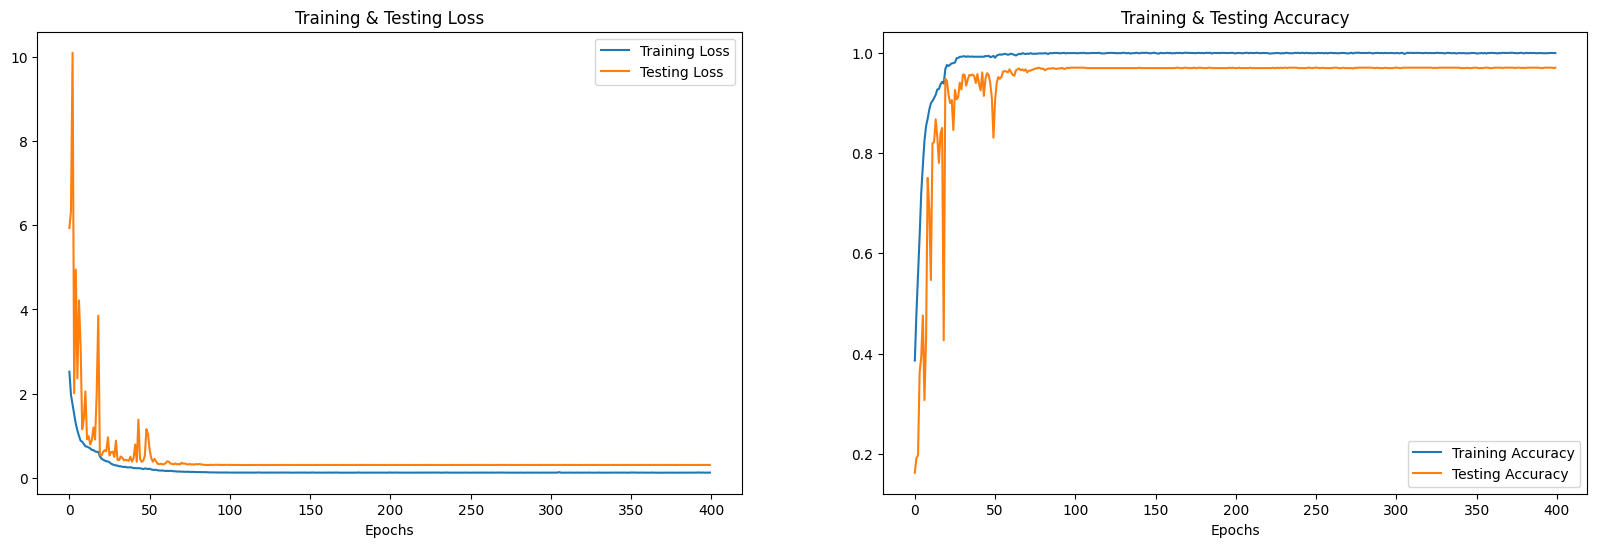

In [10]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(400)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [11]:
params = pd.DataFrame(train_acc, columns=['Training Accuracy'])
params['Training Loss'] = train_loss
params['test_acc'] = test_acc
params['test_loss'] = test_loss
params

,Training Accuracy,Training Loss,test_acc,test_loss
0,0.386238,2.521446,0.162692,5.934334
1,0.480614,1.968244,0.191652,6.327982
2,0.556881,1.739304,0.197615,10.093594
3,0.635066,1.502396,0.362862,2.009143
4,0.721133,1.282726,0.393526,4.945020
...,...,...,...,...
395,0.999148,0.125761,0.970187,0.305800
396,0.999574,0.123536,0.970187,0.306424
397,0.999361,0.124295,0.970187,0.306897
398,0.999361,0.126554,0.969336,0.307198


In [12]:
params.to_csv('Parameters.csv', index=False)

In [13]:
test_acc

[0.1626916527748108,
 0.19165247678756714,
 0.19761499762535095,
 0.3628620207309723,
 0.3935264050960541,
 0.47614991664886475,
 0.30749574303627014,
 0.42930153012275696,
 0.7504258751869202,
 0.6882452964782715,
 0.5468483567237854,
 0.8194207549095154,
 0.8219761252403259,
 0.8671209812164307,
 0.8321976065635681,
 0.7802385091781616,
 0.8390119075775146,
 0.8500851988792419,
 0.4267461597919464,
 0.9480409026145935,
 0.9437819123268127,
 0.9165247082710266,
 0.8994889259338379,
 0.9054514765739441,
 0.8458262085914612,
 0.9258943796157837,
 0.9071550369262695,
 0.9114139676094055,
 0.9403747916221619,
 0.9267461895942688,
 0.9565587639808655,
 0.9557070136070251,
 0.9344122409820557,
 0.9471890926361084,
 0.9557070136070251,
 0.95485520362854,
 0.9565587639808655,
 0.9531516432762146,
 0.9395229816436768,
 0.9574105739593506,
 0.9378194212913513,
 0.9250425696372986,
 0.9608176946640015,
 0.9139693379402161,
 0.9480409026145935,
 0.959114134311676,
 0.9557070136070251,
 0.93952298

In [14]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

37/37 [==============================] - 0s 8ms/step


In [15]:
y_pred

array([[5],
       [6],
       [6],
       ...,
       [5],
       [1],
       [4]], dtype=int64)

In [16]:
pred_test

array([[3.5826364e-10, 3.8703857e-10, 1.0000000e+00, 6.0062216e-10,
        2.5571686e-10],
       [1.5157618e-19, 6.9359266e-14, 1.2832279e-14, 1.0000000e+00,
        1.4091344e-15],
       [1.3034091e-13, 8.5741908e-10, 3.8535650e-12, 1.0000000e+00,
        7.3499171e-13],
       ...,
       [8.1969880e-08, 1.5685914e-07, 9.9999964e-01, 3.8304857e-09,
        9.4555190e-08],
       [9.9992549e-01, 6.6188361e-05, 4.1549597e-06, 3.5655323e-06,
        6.5333819e-07],
       [1.3779152e-08, 1.0000000e+00, 2.4622382e-09, 1.2202013e-09,
        2.7584951e-10]], dtype=float32)

In [17]:
prediction = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
prediction['Predicted Labels'] = y_pred.flatten()
prediction['Actual Labels'] = y_test.flatten()

prediction.head(10)

,Predicted Labels,Actual Labels
0,5,5
1,6,6
2,6,6
3,4,4
4,5,5
5,7,7
6,6,6
7,5,5
8,6,6
9,5,5


In [18]:
prediction

,Predicted Labels,Actual Labels
0,5,5
1,6,6
2,6,6
3,4,4
4,5,5
...,...,...
1169,6,6
1170,5,5
1171,5,5
1172,1,1


In [19]:
with pd.ExcelWriter('Pred.xlsx', engine='openpyxl') as writer:
    prediction.to_excel(writer, sheet_name="prediction", index=False)

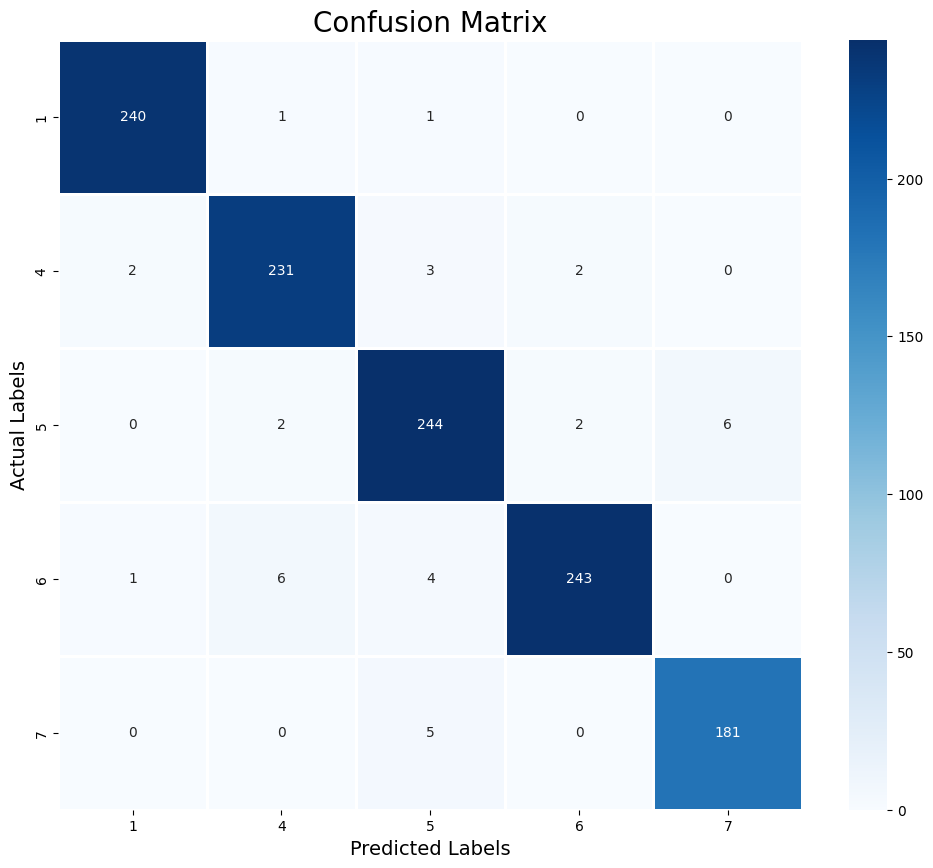

In [20]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [21]:
cm.to_csv('Confusion_matrix.csv')

In [22]:
print(classification_report(y_test, y_pred))
report = classification_report(y_test, y_pred)

              precision    recall  f1-score   support

           1       0.99      0.99      0.99       242
           4       0.96      0.97      0.97       238
           5       0.95      0.96      0.95       254
           6       0.98      0.96      0.97       254
           7       0.97      0.97      0.97       186

    accuracy                           0.97      1174
   macro avg       0.97      0.97      0.97      1174
weighted avg       0.97      0.97      0.97      1174



In [23]:
with open('report.csv', 'w') as file:
    file.write(report)

In [24]:
# Save the Keras model
model.save('saved_models/audio_classification_final.hdf5')

In [25]:
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
converter._experimental_lower_tensor_list_ops = False

tflite_model = converter.convert()

# Save the converted model
with open('saved_models/audio_classification_final.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\palsh\AppData\Local\Temp\tmp7u9ckery\assets


INFO:tensorflow:Assets written to: C:\Users\palsh\AppData\Local\Temp\tmp7u9ckery\assets


: 